In [1]:
import pandas as pd #for data manipulation and analyss
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for static, animated and interacive visualizations
import seaborn as sns # for stat graphs 
df = pd.read_csv('Amazon Sale Report.csv')

# Add the following lines to inspect  data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())


First 5 rows of the dataset:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0      

C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\3924361969.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [2]:
# Drop the 'Unnamed: 22' column as it appears to be irrelevant or empty
df = df.drop('Unnamed: 22', axis=1)

In [3]:

# Verify the change 
print(df['Date'].head())


0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: Date, dtype: object


In [4]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Verify the change by checking the info and head again
print("DataFrame Info after Date conversion:")
df.info()

print("\nFirst 5 rows of Date column after conversion:")
print(df['Date'].head())

C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\3740322287.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DataFrame Info after Date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object     

In [5]:
# === Handling Missing Values ===

# 1. Drop rows where 'Amount' is missing:
# 'Amount' and 'currency' are critical for sales analysis.
# If they are missing, the order details are incomplete.
# First, let's see how many rows have missing Amount or currency
print(f"Rows with missing Amount: {df['Amount'].isnull().sum()}")
print(f"Rows with missing Currency: {df['currency'].isnull().sum()}")

# Drop these rows. Using inplace=True modifies the DataFrame directly.
df.dropna(subset=['Amount', 'currency'], inplace=True)
print(f"\nDataFrame shape after dropping rows with missing Amount/Currency: {df.shape}")

# 2. Fill missing values in other relevant columns:
# For categorical columns, filling with 'Unknown' or 'No Information' is often a good strategy
# if you want to keep the rows and treat missingness as a category.

print(f"\nRows with missing Courier Status BEFORE fill: {df['Courier Status'].isnull().sum()}")
df['Courier Status'].fillna('Unknown', inplace=True)
print(f"Rows with missing Courier Status AFTER fill: {df['Courier Status'].isnull().sum()}")

print(f"\nRows with missing promotion-ids BEFORE fill: {df['promotion-ids'].isnull().sum()}")
df['promotion-ids'].fillna('No Promotion', inplace=True)
print(f"Rows with missing promotion-ids AFTER fill: {df['promotion-ids'].isnull().sum()}")

print(f"\nRows with missing fulfilled-by BEFORE fill: {df['fulfilled-by'].isnull().sum()}")
df['fulfilled-by'].fillna('Unknown', inplace=True)
print(f"Rows with missing fulfilled-by AFTER fill: {df['fulfilled-by'].isnull().sum()}")

# For shipping address components, fill with 'Unknown' as well for now
# If these are crucial for geographical analysis, you might want a different strategy
# (e.g., dropping rows, or trying to impute from other data if possible).
print(f"\nRows with missing ship-city BEFORE fill: {df['ship-city'].isnull().sum()}")
df['ship-city'].fillna('Unknown', inplace=True)
print(f"Rows with missing ship-city AFTER fill: {df['ship-city'].isnull().sum()}")

print(f"\nRows with missing ship-state BEFORE fill: {df['ship-state'].isnull().sum()}")
df['ship-state'].fillna('Unknown', inplace=True)
print(f"Rows with missing ship-state AFTER fill: {df['ship-state'].isnull().sum()}")

print(f"\nRows with missing ship-country BEFORE fill: {df['ship-country'].isnull().sum()}")
df['ship-country'].fillna('Unknown', inplace=True)
print(f"Rows with missing ship-country AFTER fill: {df['ship-country'].isnull().sum()}")

# For ship-postal-code, it's numerical (float64) but can have NaNs.
# Filling with -1 is a common technique for numerical missing values that you want to keep distinct.
print(f"\nRows with missing ship-postal-code BEFORE fill: {df['ship-postal-code'].isnull().sum()}")
df['ship-postal-code'].fillna(-1, inplace=True)
print(f"Rows with missing ship-postal-code AFTER fill: {df['ship-postal-code'].isnull().sum()}")

# After handling missing values, it's always good to check info again
print("\nDataFrame Info after handling missing values:")
df.info()

Rows with missing Amount: 7795
Rows with missing Currency: 7795

DataFrame shape after dropping rows with missing Amount/Currency: (121180, 23)

Rows with missing Courier Status BEFORE fill: 5136
Rows with missing Courier Status AFTER fill: 0

Rows with missing promotion-ids BEFORE fill: 41698
Rows with missing promotion-ids AFTER fill: 0

Rows with missing fulfilled-by BEFORE fill: 83639
Rows with missing fulfilled-by AFTER fill: 0

Rows with missing ship-city BEFORE fill: 31
Rows with missing ship-city AFTER fill: 0

Rows with missing ship-state BEFORE fill: 31
Rows with missing ship-state AFTER fill: 0

Rows with missing ship-country BEFORE fill: 31
Rows with missing ship-country AFTER fill: 0

Rows with missing ship-postal-code BEFORE fill: 31
Rows with missing ship-postal-code AFTER fill: 0

DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count 

C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\27527272.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('Unknown', inplace=True)
C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\27527272.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
# === Filter Out Non-Sale / Zero-Value Orders ===

# First, let's see the value counts for 'Status' to decide what to keep
print("\nOriginal Status counts BEFORE filtering by status:")
print(df['Status'].value_counts())

# Define statuses that represent a completed sale or delivery
# (You might adjust this list based on your interpretation of the data)
# Common successful statuses are usually 'Shipped', 'Delivered to Buyer', 'Delivered'.
# Let's ensure 'Cancelled' and other non-sale statuses are excluded.
successful_statuses = ['Shipped', 'Delivered to Buyer', 'Delivered']

# Filter the DataFrame to include only these successful orders
# Use .copy() to create a new DataFrame and avoid SettingWithCopyWarning
df = df[df['Status'].isin(successful_statuses)].copy()
print(f"\nDataFrame shape after filtering by successful Status: {df.shape}")

# Further filter out orders with 0 Amount or 0 Quantity, as these aren't sales
df = df[df['Amount'] > 0].copy()
df = df[df['Qty'] > 0].copy() # Assuming quantity should also be positive for a valid purchase

print(f"DataFrame shape after filtering out zero Amount/Qty: {df.shape}")

# Check status counts again after filtering (should only show successful ones)
print("\nStatus counts AFTER filtering by status, Amount, and Qty:")
print(df['Status'].value_counts())

# === Explore Categorical Column Distributions ===
# This section will help you understand the common values in your key text-based columns.

print("\nUnique Fulfilment counts:")
print(df['Fulfilment'].value_counts())

print("\nUnique Sales Channel counts:")
print(df['Sales Channel '].value_counts())

print("\nUnique Category counts:")
print(df['Category'].value_counts())

print("\nUnique Size counts:")
print(df['Size'].value_counts())

print("\nUnique ship-state counts (top 10):")
print(df['ship-state'].value_counts().head(10)) # Showing top 10 as there might be many states


Original Status counts BEFORE filtering by status:
Status
Shipped                          77596
Shipped - Delivered to Buyer     28761
Cancelled                        10766
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

DataFrame shape after filtering by successful Status: (77596, 23)
DataFrame shape after filtering out zero Amount/Qty: (76078, 23)

Status counts AFTER filtering by status, Amount, and Qty:
Status
Shipped    76078
Name: count, dtype: int64

Unique Fulfilment counts:
Fulfilment
Amazon    76078
Name: count, dtype: int64

Unique Sales Channel counts:
Sales Channel 
Amazon.in    76078
Name: count, dtype: int64

Unique Category counts:
Category
ku


Daily Sales Trends (first 5 rows):
        Date  total_amount  total_qty  num_orders
0 2022-03-31       84013.0        135         123
1 2022-04-01      620639.0        951         870
2 2022-04-02      656186.0       1020         943
3 2022-04-03      726149.0       1097        1006
4 2022-04-04      621281.0        939         886


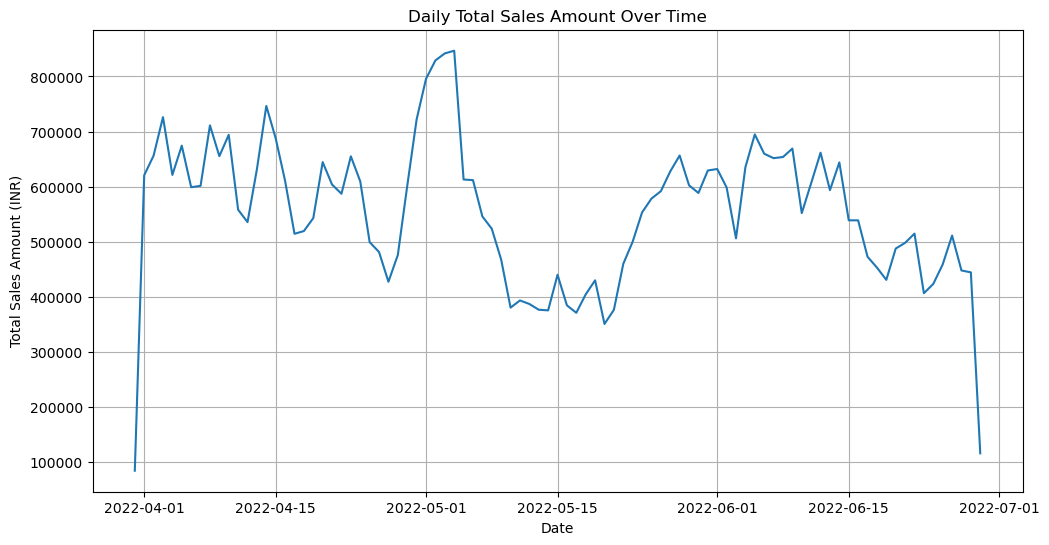

In [7]:
# Aggregate sales by Date
daily_sales = df.groupby('Date').agg(
    total_amount=('Amount', 'sum'),
    total_qty=('Qty', 'sum'),
    num_orders=('Order ID', 'nunique')
).reset_index()

print("\nDaily Sales Trends (first 5 rows):")
print(daily_sales.head())

# Plotting daily sales amount
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['total_amount'])
plt.title('Daily Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (INR)')
plt.grid(True)
plt.show()

# You can also resample for weekly or monthly trends
# df.set_index('Date', inplace=True) # Set Date as index first for resampling
# monthly_sales = df['Amount'].resample('M').sum()
# monthly_sales.plot(figsize=(10, 5), title='Monthly Sales Trend')
# plt.show()
# df.reset_index(inplace=True) # Reset index if you need Date as a regular column later


Top 10 States by Total Sales Amount:
ship-state
MAHARASHTRA       8743630.0
KARNATAKA         7094688.0
TELANGANA         4506844.0
TAMIL NADU        4293145.0
UTTAR PRADESH     4239078.0
DELHI             2763495.0
WEST BENGAL       2309741.0
KERALA            2175864.0
ANDHRA PRADESH    1992106.0
HARYANA           1901108.0
Name: Amount, dtype: float64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\2896436048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_amount.values, y=top_states_amount.index, palette='magma')


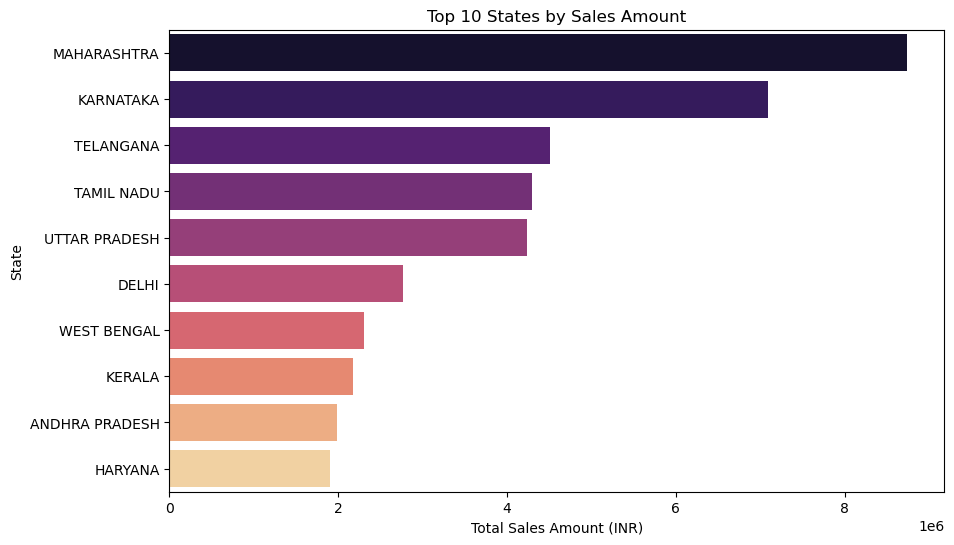

In [8]:
# Top 10 States by Total Sales Amount
top_states_amount = df.groupby('ship-state')['Amount'].sum().nlargest(10)
print("\nTop 10 States by Total Sales Amount:")
print(top_states_amount)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_amount.values, y=top_states_amount.index, palette='magma')
plt.title('Top 10 States by Sales Amount')
plt.xlabel('Total Sales Amount (INR)')
plt.ylabel('State')
plt.show()

# You can do the same for 'ship-city' (might be too many, consider top N)
# top_cities_amount = df.groupby('ship-city')['Amount'].sum().nlargest(10)
# print("\nTop 10 Cities by Total Sales Amount:")
# print(top_cities_amount)

In [9]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['HourOfDay'] = df['Date'].dt.hour
print("\nSales by Day of Week:")
print(df.groupby('DayOfWeek')['Amount'].sum().sort_values(ascending=False))
# Plot this as a bar chart


Sales by Day of Week:
DayOfWeek
Sunday       7663208.0
Saturday     7405887.0
Tuesday      7247142.0
Monday       7155660.0
Friday       7127597.0
Wednesday    6979503.0
Thursday     6745258.0
Name: Amount, dtype: float64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\1342299953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')



Top 5 Categories in MAHARASHTRA:
Category
kurta            5105
Set              5067
Top              1608
Western Dress    1402
Ethnic Dress      154
Name: count, dtype: int64


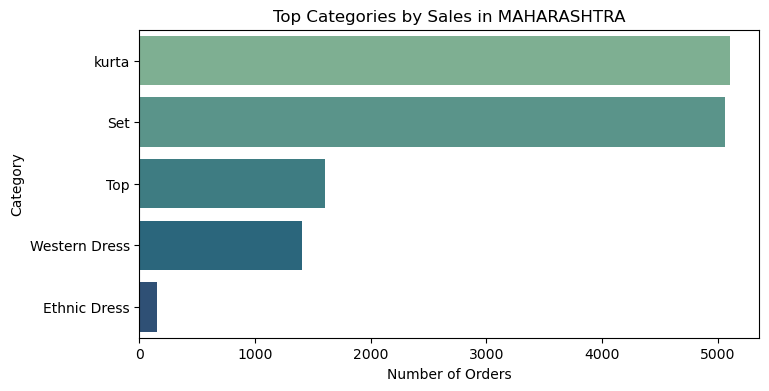


Top 5 Categories in KARNATAKA:
Category
kurta            4237
Set              4125
Western Dress    1153
Top               982
Blouse            138
Name: count, dtype: int64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\1342299953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')


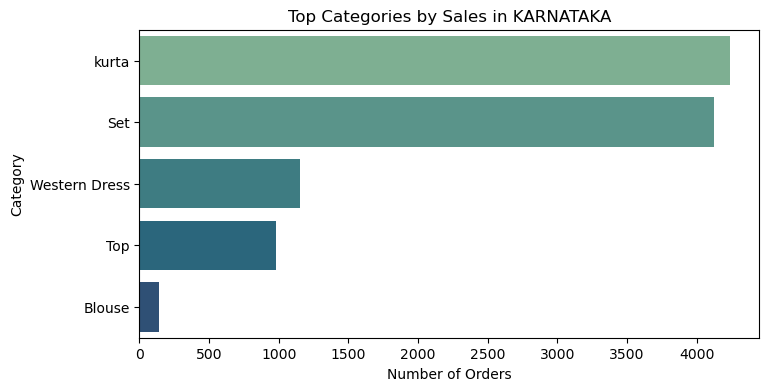


Top 5 Categories in TELANGANA:
Category
kurta            2998
Set              2376
Western Dress     878
Top               422
Ethnic Dress       75
Name: count, dtype: int64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\1342299953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')


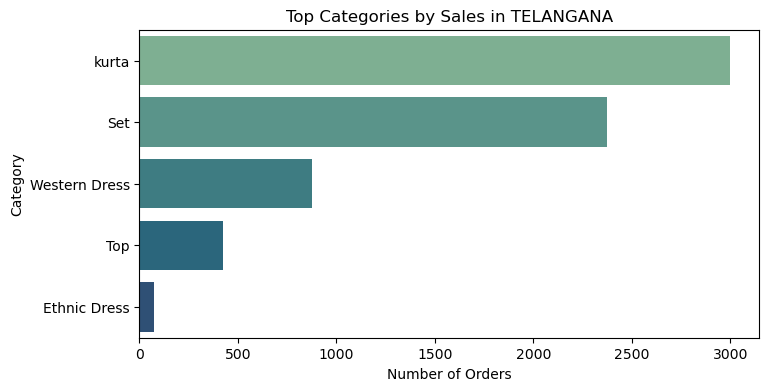

In [10]:
# Example: Top categories in the top 3 states
top_states = ['MAHARASHTRA', 'KARNATAKA', 'TELANGANA'] # From your previous analysis

for state in top_states:
    state_df = df[df['ship-state'] == state]
    top_categories_in_state = state_df['Category'].value_counts().nlargest(5)
    print(f"\nTop 5 Categories in {state}:")
    print(top_categories_in_state)

    # Optional: Plotting for each state
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')
    plt.title(f'Top Categories by Sales in {state}')
    plt.xlabel('Number of Orders') # Or sum of Qty, or sum of Amount
    plt.ylabel('Category')
    plt.show()

In [11]:
avg_order_value = df['Amount'].mean()
print(f"\nAverage Order Value: {avg_order_value:.2f} INR")

# To get items per *unique* order, group by Order ID first
avg_qty_per_order = df.groupby('Order ID')['Qty'].sum().mean()
print(f"Average Quantity per Order: {avg_qty_per_order:.2f} items")


Average Order Value: 661.48 INR
Average Quantity per Order: 1.07 items



Total Sales by B2B Status:
B2B
False    49960881.0
True       363374.0
Name: Amount, dtype: float64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\847702339.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b2b_sales.index, y=b2b_sales.values, palette='coolwarm')


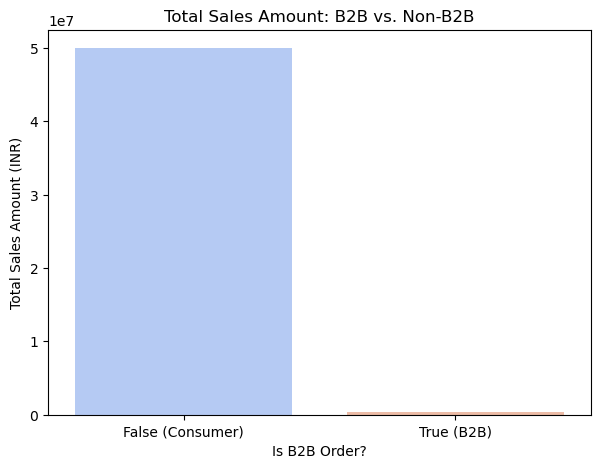

In [12]:
b2b_sales = df.groupby('B2B')['Amount'].sum()
print("\nTotal Sales by B2B Status:")
print(b2b_sales)

# Plot this
plt.figure(figsize=(7, 5))
sns.barplot(x=b2b_sales.index, y=b2b_sales.values, palette='coolwarm')
plt.title('Total Sales Amount: B2B vs. Non-B2B')
plt.xlabel('Is B2B Order?')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks([0, 1], ['False (Consumer)', 'True (B2B)']) # Label x-axis
plt.show()


Top 5 Categories in MAHARASHTRA:
Category
kurta            5105
Set              5067
Top              1608
Western Dress    1402
Ethnic Dress      154
Name: count, dtype: int64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\903798709.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')


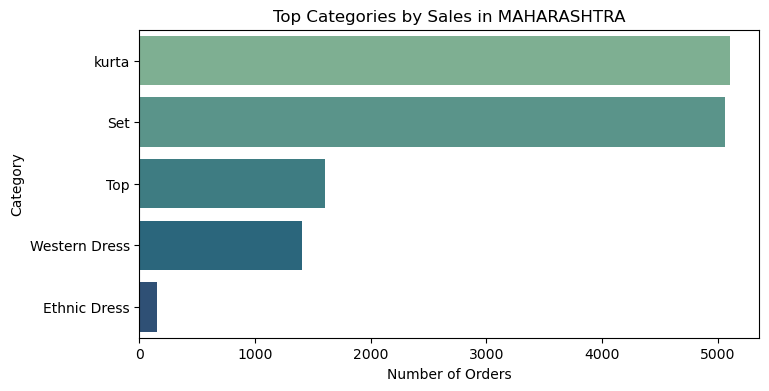


Top 5 Categories in KARNATAKA:
Category
kurta            4237
Set              4125
Western Dress    1153
Top               982
Blouse            138
Name: count, dtype: int64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\903798709.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')


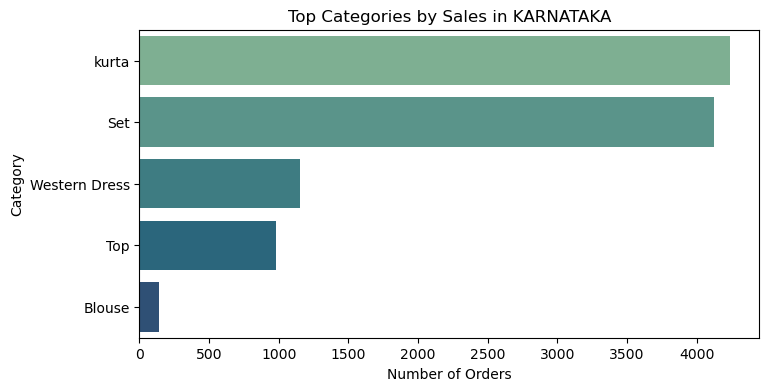


Top 5 Categories in TELANGANA:
Category
kurta            2998
Set              2376
Western Dress     878
Top               422
Ethnic Dress       75
Name: count, dtype: int64


C:\Users\joseu\AppData\Local\Temp\ipykernel_7176\903798709.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')


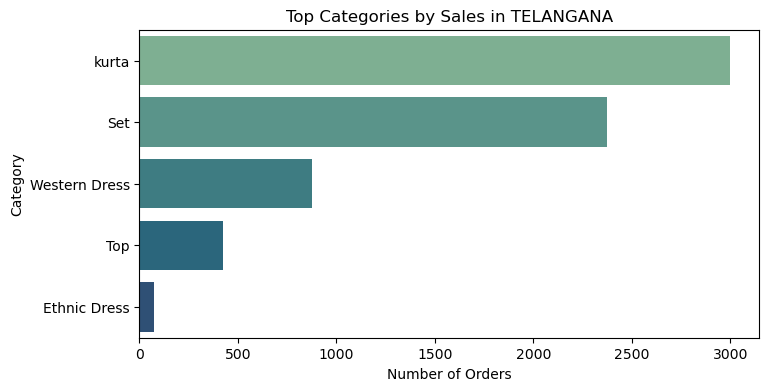

In [13]:
# Example: Top categories in the top 3 states (adjust top_states based on your previous analysis)
top_states = ['MAHARASHTRA', 'KARNATAKA', 'TELANGANA'] # From your earlier analysis

for state in top_states:
    state_df = df[df['ship-state'] == state]
    top_categories_in_state = state_df['Category'].value_counts().nlargest(5)
    print(f"\nTop 5 Categories in {state}:")
    print(top_categories_in_state)

    # Optional: Plotting for each state
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_categories_in_state.values, y=top_categories_in_state.index, palette='crest')
    plt.title(f'Top Categories by Sales in {state}')
    plt.xlabel('Number of Orders') # Or sum of Qty, or sum of Amount
    plt.ylabel('Category')
    plt.show()

In [14]:
import sqlite3
import pandas as pd

# 1. Establish a new connection for querying
# It's generally best to open a connection, do your queries, and then close it.
conn = sqlite3.connect('amazon_sales.db')
print("Connected to amazon_sales.db for querying.")

# SQL Query: Total sales amount by day of week
# Assuming 'DayOfWeek' column exists in your sales_report table in SQLite
sql_query_day_of_week = """
SELECT
    DayOfWeek,
    SUM(Amount) AS TotalSalesAmount
FROM
    sales_report
GROUP BY
    DayOfWeek
ORDER BY
    CASE DayOfWeek
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' THEN 6
        WHEN 'Sunday' THEN 7
    END;
"""

try:
    df_day_of_week_sql = pd.read_sql_query(sql_query_day_of_week, conn)
    print("\n--- Total Sales Amount by Day of Week (SQL Query) ---")
    print(df_day_of_week_sql)

except pd.io.sql.DatabaseError as e:
    print(f"SQL Query Error: {e}")
    # This might happen if 'DayOfWeek' column doesn't exist in the SQL table.
    # Check your `df.to_sql` step to ensure 'DayOfWeek' was in `df` when it was written.

finally:
    # 2. Close the connection
    conn.close()
    print("\nDatabase connection closed.")

Connected to amazon_sales.db for querying.

--- Total Sales Amount by Day of Week (SQL Query) ---
   DayOfWeek  TotalSalesAmount
0     Monday         7155660.0
1    Tuesday         7247142.0
2  Wednesday         6979503.0
3   Thursday         6745258.0
4     Friday         7127597.0
5   Saturday         7405887.0
6     Sunday         7663208.0

Database connection closed.
